<a href="https://colab.research.google.com/github/ejrtks1020/Bigdata_Analysis_Certification/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7. 머신러닝 프로세스4: 모델 훈련과 세부튜닝

세부 튜닝은 모델의 하이퍼 파라미터를 찾는것을 의미한다.

LogisticRegression의 핵심 파라미터는 'C'이며 디폴트 값은 'C = 1'이다.

하이퍼 파라미터를 찾는 방법은 크게 2가지이다.

1. 그리드 서치(Grid Search)

2. 랜덤 서치(Random Search)

##7.1 데이터 불러오기 및 데이터 셋 분할

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df = pd.read_csv('Fvote.csv')

In [ ]:
#특성변수와 레이블 데이터셋 분할
X = df[df.columns[1:13]]
y = df[['vote']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

##7.2 Grid Search

In [ ]:
#C값을 6개 제시하면 6개 C값에 대한 모델 결과 6개가 제시된다.
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.001, 0.1, 0.1, 1, 10 ,100]}


In [ ]:
from sklearn.linear_model import LogisticRegression

* GridSearch(Model명(), 설정한 그리드 서치, cv(옵션), return_train_score(옵션)

In [ ]:
grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid=param_grid,
                           cv = 5,
                           return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.1, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
# 정확도가 가장 높은 하이퍼 파라미터 C는 'grid_search.best_params_'에 있다.
print("Best Parameter: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameter:  {'C': 10}
Best Score:  0.7274193548387096


C = 10일때, 정확도는 0.72로 가장 높았다.

In [ ]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.679


테스트데이터에 적용한 정확도는 67.9%로 나타났다.

In [ ]:
#그리드 서치 하이퍼파라미터별, cross validation별, 상세 결곽밧은 'grid_search.cv_results_'에 있다.
result_grid = pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006335,0.003245,0.001032,0.000098,0.001,{'C': 0.001},0.68750,0.71875,0.71875,0.709677,0.709677,0.708871,0.011430,6,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.007857,0.000569,0.001128,0.000117,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,0.774194,0.721573,0.030797,3,0.738095,0.746032,0.738095,0.740157,0.716535,0.735783,0.010053
2,0.009635,0.002168,0.001383,0.000204,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,0.774194,0.721573,0.030797,3,0.738095,0.746032,0.738095,0.740157,0.716535,0.735783,0.010053
3,0.012051,0.000382,0.001247,0.000160,1,{'C': 1},0.71875,0.68750,0.78125,0.580645,0.806452,0.714919,0.079466,5,0.738095,0.793651,0.730159,0.763780,0.724409,0.750019,0.025634
4,0.015716,0.002955,0.001196,0.000119,10,{'C': 10},0.75000,0.68750,0.81250,0.580645,0.806452,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
5,0.018607,0.004097,0.001305,0.000250,100,{'C': 100},0.75000,0.68750,0.81250,0.580645,0.806452,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


도표로 하이퍼파라미터(C)값별로 훈련데이터와 테스트데이터의 정확도를 살펴보기 위해

X축에 result_grid['param_c']

Y축에 result_grid['mean_train_score'], result_grid['mean_test_score']를 넣고 비교해볼수 있다

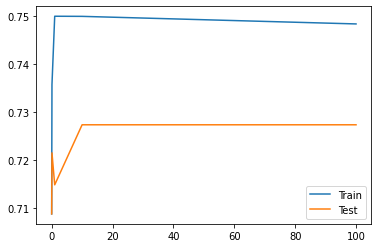

In [ ]:
import matplotlib.pyplot as plt

plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label = 'Train')
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label = 'Test')
plt.legend()
plt.show()

##7.3 Random Search

랜덤은 범위를 정하고 그 안에서 무작위로 C값을 찾는 것이다.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'C': randint(low = 0.001, high = 100)}

In [ ]:
print(randint(low = 0.001, high = 100))

랜덤서치의 기본구조는 그리드서치와 유사하나,
param_distribution, n_iter 등이 다르다.

n_iter는 랜덤하게 C값을 몇번 뽑는가를 정의한다.(n_iter = 100은 100개의 모델을 결과를 제시)


In [ ]:
random_search = RandomizedSearchCV(estimator = LogisticRegression(),
                                   param_distributions = param_distribs,
                                   cv = 5,
                                   #n_iter = 100, 기본 랜덤 횟수는 10
                                   return_train_score = True)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4fd8369910>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [ ]:
print("Best param : ", random_search.best_params_)
print("Best score : ", random_search.best_score_)

Best param :  {'C': 50}
Best score :  0.7274193548387096


C = 50일때 정확도 72로 가장 높게 나온다.

In [ ]:
print("Test Set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test Set Score: 0.679


테스트 데이터에 최적 탐색 하이퍼파라미터를 적용한 정확도는 67.9%로 그리드 탐색과 유사한 결과를 보이고 있다.

In [ ]:
result_random = pd.DataFrame(random_search.cv_results_)
result_random

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017003,0.000662,0.001159,0.000020,50,{'C': 50},0.75000,0.6875,0.81250,0.580645,0.806452,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
1,0.017073,0.000743,0.001168,0.000030,16,{'C': 16},0.75000,0.6875,0.81250,0.580645,0.806452,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
2,0.015800,0.001243,0.001163,0.000021,17,{'C': 17},0.75000,0.6875,0.81250,0.580645,0.806452,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
3,0.016961,0.001190,0.001150,0.000015,16,{'C': 16},0.75000,0.6875,0.81250,0.580645,0.806452,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
4,0.018150,0.001193,0.001209,0.000093,87,{'C': 87},0.75000,0.6875,0.81250,0.580645,0.806452,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
5,0.011879,0.000665,0.001175,0.000024,1,{'C': 1},0.71875,0.6875,0.78125,0.580645,0.806452,0.714919,0.079466,10,0.738095,0.793651,0.730159,0.763780,0.724409,0.750019,0.025634
6,0.017091,0.001526,0.001175,0.000030,31,{'C': 31},0.75000,0.6875,0.81250,0.580645,0.806452,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
7,0.017645,0.005518,0.001237,0.000061,4,{'C': 4},0.75000,0.6875,0.81250,0.580645,0.806452,0.727419,0.086175,1,0.746032,0.777778,0.730159,0.779528,0.724409,0.751581,0.023218
8,0.019406,0.000774,0.001172,0.000031,80,{'C': 80},0.75000,0.6875,0.81250,0.580645,0.806452,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
9,0.018091,0.001361,0.001166,0.000012,98,{'C': 98},0.75000,0.6875,0.81250,0.580645,0.806452,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


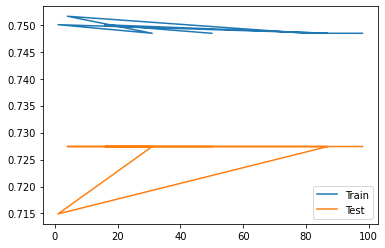

In [ ]:
plt.plot(result_random['param_C'], result_random['mean_train_score'], label = 'Train')
plt.plot(result_random['param_C'], result_random['mean_test_score'], label = 'Test')
plt.legend()
plt.show()

#8. 머신러닝 프로세스5: 모델 평가

In [ ]:
#Logistic Regression의 하이퍼파라미터 C값을 10을 최종모델로 해서 모델 평가를 진행한다
Final_model = LogisticRegression(C = 10)
Final_model.fit(X_train,y_train)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_train = Final_model.predict(X_train)
Final_model.score(X_train, y_train)

0.740506329113924

In [ ]:
pred_test = Final_model.predict(X_test)
Final_model.score(X_test, y_test)

0.6792452830188679

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_train = confusion_matrix(y_train, pred_train)
print(confusion_train)

[[ 12  34]
 [  7 105]]


혼동행렬을 보면 투표를 안한사람중 제대로 예측한 경우가 12명 밖에없어서, 
투표를 안할지에 대한 예측이 어렵다는 것을 알 수 있다.

In [ ]:
from sklearn.metrics import classification_report

cfreport_train = classification_report(y_train, pred_train)
print("분류 예측 레포트:\n", cfreport_train)

분류 예측 레포트:
               precision    recall  f1-score   support

           0       0.63      0.26      0.37        46
           1       0.76      0.94      0.84       112

    accuracy                           0.74       158
   macro avg       0.69      0.60      0.60       158
weighted avg       0.72      0.74      0.70       158



In [ ]:
confusion_test = confusion_matrix(y_test, pred_test)
print(confusion_test)

[[ 3 12]
 [ 5 33]]


테스트 데이터에 대한 예측역시 투표를 안한 사람에 대한 예측이 어렵다.

In [ ]:
#테스트 데이터의 분류모델 평가 결과의 상세 지표
cfreport_test = classification_report(y_test, pred_test)
print(cfreport_test)

              precision    recall  f1-score   support

           0       0.38      0.20      0.26        15
           1       0.73      0.87      0.80        38

    accuracy                           0.68        53
   macro avg       0.55      0.53      0.53        53
weighted avg       0.63      0.68      0.64        53



In [ ]:
#ROC계산

from sklearn.metrics import roc_curve,roc_auc_score, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Final_model.decision_function(X_test))
roc_auc = roc_auc_score(y_test, Final_model.decision_function(X_test))
roc_auc

0.6350877192982456

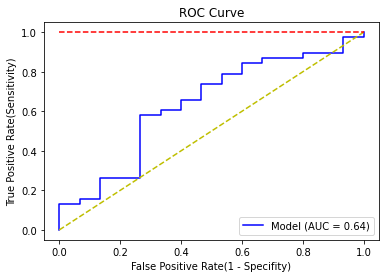

In [ ]:
#ROC Curve 도표 그리기
plt.title("ROC Curve")
plt.xlabel("False Positive Rate(1 - Specifity)")
plt.ylabel("True Positive Rate(Sensitivity)")

plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'Model (AUC = %0.2f)'%roc_auc)
plt.plot([0,1], [0,1], 'y--')
plt.plot([0,1], [1,1], 'r--')

plt.legend(loc='lower right')
plt.show()

종합적으로 아주 좋은 결과는 아니다.

이유는 알고리즘 문제보다, 투표여부를 예측, 분류하기 좋은 특성 변수(X)가 부족하기 때문, 좋은 결과는 좋은 모델보다 좋은 변수들에 의해 결정된다.

#9. 머신러닝 프로세스6: 다중분류

y 레이블이 4개범주(1,2,3,4)로 이루어진 parties(지지정당) 다중분류

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df = pd.read_csv('Fvote.csv')

In [ ]:
X = df[df.columns[1:13]]
y = df[['parties']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_train = model.predict(X_train)
model.score(X_train, y_train)

0.6139240506329114

In [ ]:
pred_test = model.predict(X_test)
model.score(X_test, y_test)

0.5283018867924528

다항분류이기때문에 이진분류보다 정확도가 낮게 나올수 있지만 좋은결과는 아니다.

In [ ]:
#훈련데이터의 혼동행렬
from sklearn.metrics import confusion_matrix

confusion_train = confusion_matrix(y_train, pred_train)
print("훈련 데이터 혼동행렬: \n",confusion_train)

훈련 데이터 혼동행렬: 
 [[21  2  3 11]
 [ 1 25  2 12]
 [ 6  2  5  6]
 [ 7  8  1 46]]


정당3의 정분류(3,3)가 가장 낮게 나온다.

In [ ]:
confusion_test = confusion_matrix(y_test, pred_test)
print("테스트 데이터 혼동행렬: \n", confusion_test)

테스트 데이터 혼동행렬: 
 [[ 6  1  2  4]
 [ 1  9  1  2]
 [ 1  2  1  2]
 [ 2  5  2 12]]


테스트 데이터의 혼동행렬역시 정당 3의 정분류가 가장낮다.

In [ ]:
#그리드탐색
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
grid_search = GridSearchCV(LogisticRegression(), param_grid = param_grid,
                           cv = 5, return_train_score = True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
print('Best Parameter: {}'.format(grid_search.best_params_))
print('Best Score: {}'.format(grid_search.best_score_))

Best Parameter: {'C': 0.1}
Best Score: 0.54375


In [ ]:
print('Test set Score: {}'.format(grid_search.score(X_test, y_test)))

Test set Score: 0.5849056603773585


C = 0.1의 모델을 적용한 결과 정확도는 58.5%로 제시 되었다.

In [ ]:
#랜덤 탐색
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'C' : randint(low = 0.001 , high = 100)}

In [ ]:
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_distribs,
                                   cv = 5,
                                   #n_iter = 100 (디폴트 = 10)
                                   return_train_score = True)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7effd89ee9d0>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [ ]:
print('Best Parameter: {}'.format(random_search.best_params_))
print('Best Score: {}'.format(random_search.best_score_))

Best Parameter: {'C': 59}
Best Score: 0.5185483870967742


In [ ]:
#C값이 59일때 테스트 데이터 정확도
print('Test Set Score: {}'.format(random_search.score(X_test, y_test)))

Test Set Score: 0.5094339622641509


- 지지정당을 인구학적특성과 정치태도 몇 개 변수로 예측하는것은 어려운 일이다.

- 다중분류는 y 레이블 범주 수만 다를뿐 이진분류와 동일하다.